In [1]:
import pandas as pd
import csv

The table of toronto neighborhoods is available at https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

This table has been converted into a pandas datframe below: 


In [2]:
df=pd.read_html('https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M')

In [3]:
print(df[0])

    Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                          Neighborhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                       

In [4]:
df1=pd.DataFrame()

In [5]:
df1.insert(0,'Postal Code',df[0]['Postal Code'])
df1.insert(1,'Borough',df[0]['Borough'])
df1.insert(2,'Neighborhood',df[0]['Neighborhood'])

In [6]:
df1.reset_index()
df1

Postal Code           Borough  \
0           M1A      Not assigned   
1           M2A      Not assigned   
2           M3A        North York   
3           M4A        North York   
4           M5A  Downtown Toronto   
..          ...               ...   
175         M5Z      Not assigned   
176         M6Z      Not assigned   
177         M7Z      Not assigned   
178         M8Z         Etobicoke   
179         M9Z      Not assigned   

                                          Neighborhood  
0                                         Not assigned  
1                                         Not assigned  
2                                            Parkwoods  
3                                     Victoria Village  
4                            Regent Park, Harbourfront  
..                                                 ...  
175                                       Not assigned  
176                                       Not assigned  
177                                       Not assigned  
178  Mimico NW, The Queensway West, South of Bloor,...  
179                                       Not assigned  

[180 rows x 3 columns]

Dropping rows with Na values:

In [7]:
df1.drop(df1[df1.Borough=='Not assigned'].index,inplace=True)


In [8]:

#df1=df1.drop('Unnamed: 0.1',axis=1)
df1.head(20)

Postal Code           Borough  \
2          M3A        North York   
3          M4A        North York   
4          M5A  Downtown Toronto   
5          M6A        North York   
6          M7A  Downtown Toronto   
8          M9A         Etobicoke   
9          M1B       Scarborough   
11         M3B        North York   
12         M4B         East York   
13         M5B  Downtown Toronto   
14         M6B        North York   
17         M9B         Etobicoke   
18         M1C       Scarborough   
20         M3C        North York   
21         M4C         East York   
22         M5C  Downtown Toronto   
23         M6C              York   
26         M9C         Etobicoke   
27         M1E       Scarborough   
30         M4E      East Toronto   

                                         Neighborhood  
2                                           Parkwoods  
3                                    Victoria Village  
4                           Regent Park, Harbourfront  
5                    Lawrence Manor, Lawrence Heights  
6         Queen's Park, Ontario Provincial Government  
8             Islington Avenue, Humber Valley Village  
9                                      Malvern, Rouge  
11                                          Don Mills  
12                    Parkview Hill, Woodbine Gardens  
13                           Garden District, Ryerson  
14                                          Glencairn  
17  West Deane Park, Princess Gardens, Martin Grov...  
18             Rouge Hill, Port Union, Highland Creek  
20                                          Don Mills  
21                                   Woodbine Heights  
22                                     St. James Town  
23                                 Humewood-Cedarvale  
26  Eringate, Bloordale Gardens, Old Burnhamthorpe...  
27                  Guildwood, Morningside, West Hill  
30                                        The Beaches

In [9]:
df1.loc[df1['Postal Code']=='M1W']

Postal Code      Borough                   Neighborhood
144         M1W  Scarborough  Steeles West, L'Amoreaux West

In [10]:
df1.loc[df1['Neighborhood']=='Not assigned','Neighborhood']=df1.Borough

In [11]:
df1=df1.reset_index(drop=True)
df1=df1.drop(df1.index[11])# drop this row since foursquare returns no venues for this
df1=df1.reset_index(drop=True)
df1.head(20)

Postal Code           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M1C       Scarborough   
12         M3C        North York   
13         M4C         East York   
14         M5C  Downtown Toronto   
15         M6C              York   
16         M9C         Etobicoke   
17         M1E       Scarborough   
18         M4E      East Toronto   
19         M5E  Downtown Toronto   

                                         Neighborhood  
0                                           Parkwoods  
1                                    Victoria Village  
2                           Regent Park, Harbourfront  
3                    Lawrence Manor, Lawrence Heights  
4         Queen's Park, Ontario Provincial Government  
5             Islington Avenue, Humber Valley Village  
6                                      Malvern, Rouge  
7                                           Don Mills  
8                     Parkview Hill, Woodbine Gardens  
9                            Garden District, Ryerson  
10                                          Glencairn  
11             Rouge Hill, Port Union, Highland Creek  
12                                          Don Mills  
13                                   Woodbine Heights  
14                                     St. James Town  
15                                 Humewood-Cedarvale  
16  Eringate, Bloordale Gardens, Old Burnhamthorpe...  
17                  Guildwood, Morningside, West Hill  
18                                        The Beaches  
19                                        Berczy Park

In [12]:
df1.shape

(102, 3)

In [13]:
!conda install -c conda-forge geopy --yes

Solving environment: done

# All requested packages already installed.



import Nominatim to find coordinates of neighborhoods:

In [14]:
from geopy.geocoders import Nominatim

In [15]:
df1['latitude']=""
df1['longitude']=""


After Cleaning the data and dropping rows whose coordinates could not be find by using Nominatim Package, a csv file 'Toronto_areas' was created. Can be accesed below:-

In [16]:
df1=pd.read_csv('Toronto_areas.csv',header=0)


The code below finds the coordinates of the neighborhoods and adds them to the data frame. The process might take a few minutes.


In [17]:
for nd in df1['Neighborhood']:
    address=nd.split(',')[0]+",Toronto"
    geolocator = Nominatim(user_agent="toronto")
    location = geolocator.geocode(address)
    df1.loc[df1['Neighborhood'].str.contains(nd.split(',')[0]),'latitude']=location.latitude
    df1.loc[df1['Neighborhood'].str.contains(nd.split(',')[0]),'longitude']=location.longitude

In [18]:
df1=df1.drop('Unnamed: 0',axis=1)


In [19]:
df1.tail()


Postal Code          Borough       Neighborhood   latitude  longitude
94         M1N      Scarborough        Birch Cliff  43.691805 -79.264494
95         M5R  Central Toronto          Davenport  43.671545 -79.448322
96         M9N             York  York South-Weston  43.684466 -79.498818
97         M3B       North York    Edwards Gardens  43.731442 -79.358380
98         M4C        East York   Toronto Danforth  43.678944 -79.344860

In [20]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(df1['Borough'].unique()),
        df1.shape[0]
    )
)

The dataframe has 9 boroughs and 99 neighborhoods.


In [21]:
address = 'Toronto, Ontario'

geolocator = Nominatim(user_agent="-")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geographical coordinates of Toronto are {}, {}.'.format(latitude, longitude))

The geographical coordinates of Toronto are 43.6534817, -79.3839347.


Visualisation of the slected neighborhood using folium:

In [22]:
!conda install -c conda-forge folium=0.5.0 --yes
import folium


Solving environment: done

# All requested packages already installed.



In [23]:
Toronto_map=folium.Map(location=[latitude,longitude],zoom_start=10)
for lat, lng, borough, neighborhood in zip(df1['latitude'], df1['longitude'], df1['Borough'],df1['Neighborhood']):
    label = '{},{}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.4,
        parse_html=False).add_to(Toronto_map)  
    
Toronto_map


Foursquare API has been used to get Venues Data. The API credentials are listed below.


In [24]:
import requests
from pandas.io.json import json_normalize 
CLIENT_ID = 'QXPPBDMPWTHSFATQGXNDG3SFDXEAR1K52Z1HF4BPMHCY4LDI' 
CLIENT_SECRET = 'UK0B3LTBOZD50XOUZSCEQCFXHUBCHDVJK5JCYUTAANEENHPO' 
#VERSION = '20180605' # Foursquare API version
VERSION = '20200101'
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QXPPBDMPWTHSFATQGXNDG3SFDXEAR1K52Z1HF4BPMHCY4LDI
CLIENT_SECRET:UK0B3LTBOZD50XOUZSCEQCFXHUBCHDVJK5JCYUTAANEENHPO


In [25]:
radius=30000 #distance in metres around location (range)
Limit=500 #search results max
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            latitude, 
            longitude, 
            radius, 
            Limit)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5ee2f18cc1ce500e4eedb470'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Toronto',
  'headerFullLocation': 'Toronto',
  'headerLocationGranularity': 'city',
  'totalResults': 241,
  'suggestedBounds': {'ne': {'lat': 43.92348197000027,
    'lng': -79.01145953565931},
   'sw': {'lat': 43.38348142999973, 'lng': -79.75640986434068}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '5227bb01498e17bf485e6202',
       'name': 'Downtown Toronto',
       'location': {'lat': 43.65323167517444,
        'lng': -79.38529600606677,
        'labeledLatLngs': [{'label': 'display',
          'lat': 43.65323167517444,
          'lng': -79.38529600606677}],
    

In [26]:
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) #convert the json response to a pandas DataFrame
nearby_venues.reset_index()

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


index                       referralId  reasons.count  \
0       0   e-0-5227bb01498e17bf485e6202-0              0   
1       1   e-0-4ad4c062f964a520b5f720e3-1              0   
2       2   e-0-55a9c018498e8b05f7f870f1-2              0   
3       3   e-0-4ad4c05ef964a520daf620e3-3              0   
4       4   e-0-5a81ae339deb7d369fa7f146-4              0   
..    ...                              ...            ...   
95     95  e-0-4bb75e0f6edc76b03212321c-95              0   
96     96  e-0-53b8466a498e83df908c3f21-96              0   
97     97  e-0-55637f1c498ecfe4c5dd2322-97              0   
98     98  e-0-4b9333f1f964a520fa3a34e3-98              0   
99     99  e-0-593b43e3e185f37c5a529082-99              0   

                                        reasons.items  \
0   [{'summary': 'This spot is popular', 'type': '...   
1   [{'summary': 'This spot is popular', 'type': '...   
2   [{'summary': 'This spot is popular', 'type': '...   
3   [{'summary': 'This spot is popular', 'type': '...   
4   [{'summary': 'This spot is popular', 'type': '...   
..                                                ...   
95  [{'summary': 'This spot is popular', 'type': '...   
96  [{'summary': 'This spot is popular', 'type': '...   
97  [{'summary': 'This spot is popular', 'type': '...   
98  [{'summary': 'This spot is popular', 'type': '...   
99  [{'summary': 'This spot is popular', 'type': '...   

                    venue.id                        venue.name  \
0   5227bb01498e17bf485e6202                  Downtown Toronto   
1   4ad4c062f964a520b5f720e3  Elgin And Winter Garden Theatres   
2   55a9c018498e8b05f7f870f1                               Alo   
3   4ad4c05ef964a520daf620e3            Art Gallery of Ontario   
4   5a81ae339deb7d369fa7f146                     Hailed Coffee   
..                       ...                               ...   
95  4bb75e0f6edc76b03212321c                     Serano Bakery   
96  53b8466a498e83df908c3f21                     Tandem Coffee   
97  55637f1c498ecfe4c5dd2322                     Boxcar Social   
98  4b9333f1f964a520fa3a34e3                   Coronation Park   
99  593b43e3e185f37c5a529082                  Tennessee Tavern   

    venue.location.lat  venue.location.lng  \
0            43.653232          -79.385296   
1            43.653394          -79.378507   
2            43.648574          -79.396243   
3            43.654003          -79.392922   
4            43.658833          -79.383684   
..                 ...                 ...   
95           43.683139          -79.346531   
96           43.653559          -79.361809   
97           43.659723          -79.346871   
98           43.634553          -79.405403   
99           43.639971          -79.439874   

                        venue.location.labeledLatLngs  \
0   [{'label': 'display', 'lat': 43.65323167517444...   
1   [{'label': 'display', 'lat': 43.65339379601958...   
2   [{'label': 'display', 'lat': 43.64857357946059...   
3   [{'label': 'display', 'lat': 43.65400286033738...   
4   [{'label': 'display', 'lat': 43.65883296982352...   
..                                                ...   
95  [{'label': 'display', 'lat': 43.68313941878674...   
96  [{'label': 'display', 'lat': 43.65355870959944...   
97  [{'label': 'display', 'lat': 43.65972274135156...   
98  [{'label': 'display', 'lat': 43.63455322391303...   
99  [{'label': 'display', 'lat': 43.63997128734775...   

    venue.location.distance  ... venue.location.country  \
0                       113  ...                 Canada   
1                       437  ...                 Canada   
2                      1131  ...                 Canada   
3                       726  ...                 Canada   
4                       596  ...                 Canada   
..                      ...  ...                    ...   
95                     4468  ...                 Canada   
96                     1782  ...                 Canada   
97                     3

cleaning the above DataFrame and extracting proper values from the json response:


In [27]:
newDf_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, newDf_columns]
nearby_venues['venue.categories'] = nearby_venues.apply(lambda x: x['venue.categories'][0]['name'], axis=1)


In [28]:
nearby_venues

venue.name             venue.categories  \
0                   Downtown Toronto                 Neighborhood   
1   Elgin And Winter Garden Theatres                      Theater   
2                                Alo            French Restaurant   
3             Art Gallery of Ontario                  Art Gallery   
4                      Hailed Coffee                  Coffee Shop   
..                               ...                          ...   
95                     Serano Bakery                       Bakery   
96                     Tandem Coffee                  Coffee Shop   
97                     Boxcar Social                         Café   
98                   Coronation Park                         Park   
99                  Tennessee Tavern  Eastern European Restaurant   

    venue.location.lat  venue.location.lng  
0            43.653232          -79.385296  
1            43.653394          -79.378507  
2            43.648574          -79.396243  
3            43.654003          -79.392922  
4            43.658833          -79.383684  
..                 ...                 ...  
95           43.683139          -79.346531  
96           43.653559          -79.361809  
97           43.659723          -79.346871  
98           43.634553          -79.405403  
99           43.639971          -79.439874  

[100 rows x 4 columns]

As you can see, only 100 venues were returned when you search the whole of Toronto.
To solve this, a function 'getNearbyVenues()' is made to loop through all the neighborhoods in the data frame and return venues:

In [29]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
    
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            Limit)
            
        results = requests.get(url).json()["response"]['groups'][0]['items']
        for v in results:
            venues_list.append([
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']])
    return venues_list

The function above returns a list of venues and their coordinates. A data frame can be made from the list. 
Assign the list to toronto_venue:
P.S the process will take a few minutes

In [30]:
toronto_venue = getNearbyVenues(names=df1['Neighborhood'],
                                   latitudes=df1['latitude'],
                                   longitudes=df1['longitude']
                                  )

In [31]:
print(toronto_venue)

[['Parkwoods', 43.7587999, -79.3201966, "Allwyn's Bakery", 43.75984035203157, -79.32471879917513, 'Caribbean Restaurant'], ['Parkwoods', 43.7587999, -79.3201966, 'LCBO', 43.75777384662435, -79.31425673330513, 'Liquor Store'], ['Parkwoods', 43.7587999, -79.3201966, 'Tim Hortons', 43.76066827030228, -79.32636763515987, 'Café'], ['Parkwoods', 43.7587999, -79.3201966, 'Dollarama', 43.758135, -79.310672, 'Discount Store'], ['Parkwoods', 43.7587999, -79.3201966, 'A&W', 43.760643076161315, -79.3268649067081, 'Fast Food Restaurant'], ['Parkwoods', 43.7587999, -79.3201966, 'Tim Hortons', 43.75829469411578, -79.31230985443108, 'Coffee Shop'], ['Parkwoods', 43.7587999, -79.3201966, 'China Cottage', 43.759097495523434, -79.3104188485618, 'Hakka Restaurant'], ['Parkwoods', 43.7587999, -79.3201966, 'Staples', 43.7583791, -79.3106954, 'Paper / Office Supplies Store'], ['Parkwoods', 43.7587999, -79.3201966, 'Tim Hortons', 43.75281395751706, -79.3140672147274, 'Coffee Shop'], ['Parkwoods', 43.7587999, 

Make a data frame name 'nearby_venue' from the list:

In [32]:
nearby_venue=pd.DataFrame(toronto_venue, columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category'])

In [33]:
nearby_venue.shape


(5553, 7)

In [34]:
nearby_venue.head(10)

Neighborhood  Neighborhood Latitude  Neighborhood Longitude  \
0    Parkwoods                43.7588              -79.320197   
1    Parkwoods                43.7588              -79.320197   
2    Parkwoods                43.7588              -79.320197   
3    Parkwoods                43.7588              -79.320197   
4    Parkwoods                43.7588              -79.320197   
5    Parkwoods                43.7588              -79.320197   
6    Parkwoods                43.7588              -79.320197   
7    Parkwoods                43.7588              -79.320197   
8    Parkwoods                43.7588              -79.320197   
9    Parkwoods                43.7588              -79.320197   

             Venue  Venue Latitude  Venue Longitude  \
0  Allwyn's Bakery       43.759840       -79.324719   
1             LCBO       43.757774       -79.314257   
2      Tim Hortons       43.760668       -79.326368   
3        Dollarama       43.758135       -79.310672   
4              A&W       43.760643       -79.326865   
5      Tim Hortons       43.758295       -79.312310   
6    China Cottage       43.759097       -79.310419   
7          Staples       43.758379       -79.310695   
8      Tim Hortons       43.752814       -79.314067   
9           Subway       43.758073       -79.312235   

                  Venue Category  
0           Caribbean Restaurant  
1                   Liquor Store  
2                           Café  
3                 Discount Store  
4           Fast Food Restaurant  
5                    Coffee Shop  
6               Hakka Restaurant  
7  Paper / Office Supplies Store  
8                    Coffee Shop  
9                 Sandwich Place

In [35]:
map_of_venues = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, label in zip(nearby_venue['Venue Latitude'], nearby_venue['Venue Longitude'], nearby_venue['Venue']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=2,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_of_venues)  
    
map_of_venues

As is evident from the map, most venues in the city are concentrated in and around Downtown Toronto and along Bloor Street. 

Neighborhoods grouped by venues below:


In [36]:
venues_grouped_by_neighborhood=nearby_venue.groupby('Neighborhood').count()

venues_grouped_by_neighborhood

Neighborhood Latitude  \
Neighborhood                                                             
 Willowdale East                                                    97   
Agincourt                                                           37   
Ancaster                                                            20   
Bathurst Manor, Wilson Heights, Downsview North                     13   
Bayview Village                                                     56   
...                                                                ...   
Willowdale, Newtonbrook                                             97   
Woburn                                                              42   
Woodbine Heights                                                    29   
York Mills West                                                     20   
York South-Weston                                                   22   

                                                 Neighborhood Longitude  \
Neighborhood                                                              
 Willowdale East                                                     97   
Agincourt                                                            37   
Ancaster                                                             20   
Bathurst Manor, Wilson Heights, Downsview North                      13   
Bayview Village                                                      56   
...                                                                 ...   
Willowdale, Newtonbrook                                              97   
Woburn                                                               42   
Woodbine Heights                                                     29   
York Mills West                                                      20   
York South-Weston                                                    22   

                                                 Venue  Venue Latitude  \
Neighborhood                                                             
 Willowdale East                                    97              97   
Agincourt                                           37              37   
Ancaster                                            20              20   
Bathurst Manor, Wilson Heights, Downsview North     13              13   
Bayview Village                                     56              56   
...                                                ...             ...   
Willowdale, Newtonbrook                             97              97   
Woburn                                              42              42   
Woodbine Heights                                    29              29   
York Mills West                                     20              20   
York South-Weston                                   22              22   

                                                 Venue Longitude  \
Neighborhood                                                       
 Willowdale East                                              97   
Agincourt                                                     37   
Ancaster                                                      20   
Bathurst Manor, Wilson Heights, Downsview North               13   
Bayview Village                                               56   
...                                                          ...   
Willowdale, Newtonbrook                                       97   
Woburn                                                        42   
Woodbine Heights                                              29   
York Mills West                                               20   
York South-Weston                                             22   

                                                 Venue Category  
Neighborhood                                                     
 Willowdale East                                             97  
Agincourt                                                    37 

In [37]:
print('There are {} uniques categories of venues in the city!!.'.format(len(nearby_venue['Venue Category'].unique())))

There are 326 uniques categories of venues in the city!!.


In [38]:
toronto_onehot = pd.get_dummies(nearby_venue[['Venue Category']],prefix="",prefix_sep="")
toronto_onehot['Neighborhood']=nearby_venue['Neighborhood']
toronto_onehot

Accessories Store  Afghan Restaurant  African Restaurant  Airport  \
0                     0                  0                   0        0   
1                     0                  0                   0        0   
2                     0                  0                   0        0   
3                     0                  0                   0        0   
4                     0                  0                   0        0   
...                 ...                ...                 ...      ...   
5548                  0                  0                   0        0   
5549                  0                  0                   0        0   
5550                  0                  0                   0        0   
5551                  0                  0                   0        0   
5552                  0                  0                   0        0   

      American Restaurant  Amphitheater  Animal Shelter  Antique Shop  \
0                       0             0               0             0   
1                       0             0               0             0   
2                       0             0               0             0   
3                       0             0               0             0   
4                       0             0               0             0   
...                   ...           ...             ...           ...   
5548                    0             0               0             0   
5549                    0             0               0             0   
5550                    0             0               0             0   
5551                    0             0               0             0   
5552                    0             0               0             0   

      Aquarium  Arcade  ...  Video Store  Vietnamese Restaurant  \
0            0       0  ...            0                      0   
1            0       0  ...            0                      0   
2            0       0  ...            0                      0   
3            0       0  ...            0                      0   
4            0       0  ...            0                      0   
...        ...     ...  ...          ...                    ...   
5548         0       0  ...            0                      0   
5549         0       0  ...            0                      0   
5550         0       0  ...            0                      0   
5551         0       0  ...            0                      0   
5552         0       0  ...            0                      0   

      Warehouse Store  Whisky Bar  Wine Bar  Wine Shop  Wings Joint  \
0                   0           0         0          0            0   
1                   0           0         0          0            0   
2                   0           0         0          0            0   
3                   0           0         0          0            0   
4                   0           0         0          0            0   
...               ...         ...       ...        ...          ...   
5548                0           0         0          0            0   
5549                0           0         0          0            0   
5550                0           0         0          0            0   
5551                0           0         0          0            0   
5552                0           0         0          0            0   

      Women's Store  Xinjiang Restaurant  Yoga Studio  
0                 0                    0            0  
1                 0                    0            0  
2                 0                    0            0  
3                 0                    0            0  
4                 0                    0            0  
...             ...                  ...          ...  
5548              0                    0            0  
5549              0                    0            0  
5550              0                    0            0  
5551      

In [39]:
col_list = list(toronto_onehot.columns)
col_list.remove('Neighborhood')
cols = ['Neighborhood'] + [col for col in col_list]
toronto_onehot = toronto_onehot[cols]
toronto_onehot.head(50)

Neighborhood  Accessories Store  Afghan Restaurant  \
0                   Parkwoods                  0                  0   
1                   Parkwoods                  0                  0   
2                   Parkwoods                  0                  0   
3                   Parkwoods                  0                  0   
4                   Parkwoods                  0                  0   
5                   Parkwoods                  0                  0   
6                   Parkwoods                  0                  0   
7                   Parkwoods                  0                  0   
8                   Parkwoods                  0                  0   
9                   Parkwoods                  0                  0   
10                  Parkwoods                  0                  0   
11                  Parkwoods                  0                  0   
12                  Parkwoods                  0                  0   
13                  Parkwoods                  0                  0   
14                  Parkwoods                  0                  0   
15                  Parkwoods                  0                  0   
16                  Parkwoods                  0                  0   
17                  Parkwoods                  0                  0   
18                  Parkwoods                  0                  0   
19                  Parkwoods                  0                  0   
20                  Parkwoods                  0                  0   
21                  Parkwoods                  0                  0   
22                  Parkwoods                  0                  0   
23                  Parkwoods                  0                  0   
24                  Parkwoods                  0                  0   
25                  Parkwoods                  0                  0   
26                  Parkwoods                  0                  0   
27                  Parkwoods                  0                  0   
28                  Parkwoods                  0                  0   
29                  Parkwoods                  0                  0   
30           Victoria Village                  0                  0   
31           Victoria Village                  0                  0   
32           Victoria Village                  0                  0   
33           Victoria Village                  0                  0   
34           Victoria Village                  0                  0   
35           Victoria Village                  0                  0   
36           Victoria Village                  0                  0   
37           Victoria Village                  0                  0   
38           Victoria Village                  0                  0   
39           Victoria Village                  0                  0   
40           Victoria Village                  0                  0   
41           Victoria Village                  0                  0   
42  Regent Park, Harbourfront                  0                  0   
43  Regent Park, Harbourfront                  0                  0   
44  Regent Park, Harbourfront                  0                  0   
45  Regent Park, Harbourfront                  0                  0   
46  Regent Park, Harbourfront                  0                  0   
47  Regent Park, Harbourfront                  0                  0   
48  Regent Park, Harbourfront                  0                  0   
49  Regent Park, Harbourfront                  0                  0   

    African Restaurant  Airport  American Restaurant  Amphitheater  \
0                    0        0                    0             0   
1                    0        0                    0             0   
2                    0        0                    0             0   
3                    0        0                    0             0   
4                    0        0              

In [40]:

toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_grouped

Neighborhood  Accessories Store  \
0                                   Willowdale East                0.0   
1                                         Agincourt                0.0   
2                                          Ancaster                0.0   
3   Bathurst Manor, Wilson Heights, Downsview North                0.0   
4                                   Bayview Village                0.0   
..                                              ...                ...   
93                          Willowdale, Newtonbrook                0.0   
94                                           Woburn                0.0   
95                                 Woodbine Heights                0.0   
96                                  York Mills West                0.0   
97                                York South-Weston                0.0   

    Afghan Restaurant  African Restaurant  Airport  American Restaurant  \
0                 0.0                 0.0     0.00             0.010309   
1                 0.0                 0.0     0.00             0.000000   
2                 0.0                 0.0     0.05             0.000000   
3                 0.0                 0.0     0.00             0.076923   
4                 0.0                 0.0     0.00             0.000000   
..                ...                 ...      ...                  ...   
93                0.0                 0.0     0.00             0.010309   
94                0.0                 0.0     0.00             0.000000   
95                0.0                 0.0     0.00             0.000000   
96                0.0                 0.0     0.00             0.000000   
97                0.0                 0.0     0.00             0.045455   

    Amphitheater  Animal Shelter  Antique Shop  Aquarium  ...  Video Store  \
0            0.0             0.0           0.0       0.0  ...     0.000000   
1            0.0             0.0           0.0       0.0  ...     0.000000   
2            0.0             0.0           0.0       0.0  ...     0.000000   
3            0.0             0.0           0.0       0.0  ...     0.000000   
4            0.0             0.0           0.0       0.0  ...     0.000000   
..           ...             ...           ...       ...  ...          ...   
93           0.0             0.0           0.0       0.0  ...     0.000000   
94           0.0             0.0           0.0       0.0  ...     0.000000   
95           0.0             0.0           0.0       0.0  ...     0.034483   
96           0.0             0.0           0.0       0.0  ...     0.000000   
97           0.0             0.0           0.0       0.0  ...     0.000000   

    Vietnamese Restaurant  Warehouse Store  Whisky Bar  Wine Bar  Wine Shop  \
0                0.000000             0.00         0.0       0.0        0.0   
1                0.027027             0.00         0.0       0.0        0.0   
2                0.050000             0.05         0.0       0.0        0.0   
3                0.000000             0.00         0.0       0.0        0.0   
4                0.000000             0.00         0.0       0.0        0.0   
..                    ...              ...         ...       ...        ...   
93               0.000000             0.00         0.0       0.0        0.0   
94               0.023810             0.00         0.0       0.0        0.0   
95               0.000000             0.00         0.0       0.0        0.0   
96               0.000000             0.00         0.0       0.0        0.0   
97               0.000000             0.00         0.0       0.0        0.0   

    Wings Joint  Women's Store  Xinjiang Restaurant  Yoga Studio  
0           0.0       0.000000                  0.0     0.010309  
1           0.0       0.000000                  0.0     0.000000  
2           0.0       0.000000                  0.0     0.000000  
3           0.0       0.000000                  0.0     0.000000  
4           0.0       0.0178

The most popular venues in each neighborhood:

In [41]:
for area in toronto_grouped['Neighborhood']:
    print("_____"+area+"_____")
    temp_df = toronto_grouped[toronto_grouped['Neighborhood'] == area].T.reset_index()
    temp_df.columns = ['venue','freq']
    temp_df = temp_df.iloc[1:] #to exclude index col
    temp_df['freq'] = temp_df['freq'].astype(float)
    temp_df = temp_df.round({'freq': 2})
    print(temp_df.sort_values('freq', ascending=False).reset_index(drop=True).head(5))
    print('\n\n')



_____ Willowdale East_____
                       venue  freq
0                Coffee Shop  0.12
1                       Bank  0.04
2        Japanese Restaurant  0.04
3              Grocery Store  0.04
4  Middle Eastern Restaurant  0.03



_____Agincourt_____
                  venue  freq
0    Chinese Restaurant  0.24
1            Restaurant  0.08
2     Korean Restaurant  0.05
3           Pizza Place  0.05
4  Cantonese Restaurant  0.05



_____Ancaster_____
                venue  freq
0  Turkish Restaurant  0.10
1         Coffee Shop  0.10
2                Café  0.05
3      Sandwich Place  0.05
4   Electronics Store  0.05



_____Bathurst Manor, Wilson Heights, Downsview North_____
                       venue  freq
0         Athletics & Sports  0.15
1       Gym / Fitness Center  0.08
2  Middle Eastern Restaurant  0.08
3        Sporting Goods Shop  0.08
4             Sandwich Place  0.08



_____Bayview Village_____
                    venue  freq
0  Furniture / Home Store  0.07
1     

                  venue  freq
0           Coffee Shop  0.06
1  Gym / Fitness Center  0.03
2                  Park  0.03
3      Baseball Stadium  0.03
4        Sandwich Place  0.03



_____Rosedale_____
                    venue  freq
0             Coffee Shop  0.13
1      Italian Restaurant  0.08
2           Grocery Store  0.05
3                    Park  0.05
4  Furniture / Home Store  0.03



_____Roselawn_____
                    venue  freq
0  Furniture / Home Store  0.10
1             Coffee Shop  0.10
2                    Park  0.07
3                Pharmacy  0.05
4    Fast Food Restaurant  0.05



_____Rouge Hill, Port Union, Highland Creek_____
               venue  freq
0               Park  0.15
1      Train Station  0.08
2  Convenience Store  0.08
3       Liquor Store  0.08
4     Sandwich Place  0.08



_____Runnymede, Swansea_____
         venue  freq
0  Coffee Shop  0.10
1         Café  0.06
2          Pub  0.05
3  Pizza Place  0.05
4       Bakery  0.04



_____Runnymede, T

Making a dataframe with the top 10 venues in each neighborhood:

In [42]:
import numpy as np


ordinals = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(10):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1,ordinals[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = toronto_grouped['Neighborhood']


        
for ind in np.arange(toronto_grouped.shape[0]):
    row=toronto_grouped.iloc[ind, :]
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:10]

neighborhoods_venues_sorted.head(50)

Neighborhood   1st Most Common Venue  \
0                                     Willowdale East             Coffee Shop   
1                                           Agincourt      Chinese Restaurant   
2                                            Ancaster             Coffee Shop   
3     Bathurst Manor, Wilson Heights, Downsview North      Athletics & Sports   
4                                     Bayview Village  Furniture / Home Store   
5                                             Beaches                     Pub   
6                   Bedford Park, Lawrence Manor East             Coffee Shop   
7                                         Berczy Park             Coffee Shop   
8                                         Birch Cliff                    Park   
9        Brockton, Parkdale Village, Exhibition Place             Coffee Shop   
10  CN Tower, King and Spadina, Railway Lands, Har...                   Hotel   
11                                          Cedarbrae    Fast Food Restaurant   
12                                 Central Bay Street             Coffee Shop   
13                                           Christie       Korean Restaurant   
14                               Church and Wellesley             Coffee Shop   
15            Clarks Corners, Tam O'Shanter, Sullivan      Chinese Restaurant   
16    Cliffside, Cliffcrest, Scarborough Village West                    Park   
17                     Commerce Court, Victoria Hotel             Coffee Shop   
18                                          Davenport      Italian Restaurant   
19                                         Davisville             Coffee Shop   
20                                   Davisville North             Coffee Shop   
21                                          Don Mills          Clothing Store   
22                                          Downsview      Athletics & Sports   
23                       Dufferin, Dovercourt Village                    Café   
24      East Toronto, Broadview North (Old East York)             Coffee Shop   
25                                    Edwards Gardens        Botanical Garden   
26  Eringate, Bloordale Gardens, Old Burnhamthorpe...       Convenience Store   
27                       Fairview, Henry Farm, Oriole             Coffee Shop   
28             First Canadian Place, Underground city             Coffee Shop   
29    Forest Hill North & West, Forest Hill Road Park      Italian Restaurant   
30                           Garden District, Ryerson             Coffee Shop   
31                                          Glencairn           Grocery Store   
32                    Golden Mile, Clairlea, Oakridge             Coffee Shop   
33                  Guildwood, Morningside, West Hill                    Park   
34  Harbourfront East, Union Station, Toronto Islands             Coffee Shop   
35                      High Park, The Junction South             Coffee Shop   
36                                  Hillcrest Village                    Park   
37                                      Humber Summit       Convenience Store   
38            Islington Avenue, Humber Valley Village             Pizza Place   
39                                 Jane Sheppard mall                    Park   
40                                     Jane and Finch                   Hotel   
41        Kennedy Park, Ionview, East Birchmount Park          Discount Store   
42          Kensington Market, Chinatown, Grange Park                    Café   
43                                    L'Amoreaux West      Chinese Restaurant   
44                   Lawrence Manor, Lawrence Heights             Coffee Shop   
45                                      Lawrence Park        Sushi Restaurant   
46                                            Leaside                  Bakery   
47                           Little Portugal, Trinity                    Café   
48                                     Malvern, Rouge                   

In [43]:
from sklearn.preprocessing import MinMaxScaler
df=toronto_grouped.drop('Neighborhood',axis=1)
scaler =MinMaxScaler()
X = scaler.fit_transform(df)

In [47]:
from sklearn.cluster import KMeans
distortions = []
K = range(1,20)
for k in K:
    kmeanModel = KMeans(n_clusters=k, init='k-means++', n_init=10, max_iter=300, tol=0.0001,  random_state=10)
    kmeanModel.fit(X)
    distortions.append(kmeanModel.inertia_)

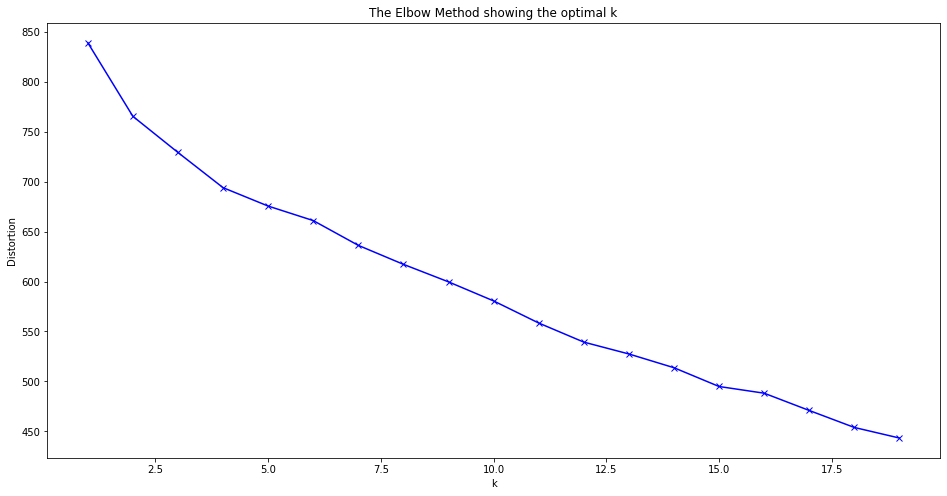

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

As we can see from the above graph, there is no sure way of determining the best no of clusters, since the graph is almost linear.

In [50]:
import numpy as numpy
import sklearn
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
range_n_clusters = list (range(2,35))


for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters)
    preds = clusterer.fit_predict(X)
    centers = clusterer.cluster_centers_
    labels = clusterer.labels_

    score = metrics.silhouette_score(X, labels,metric='euclidean')
    score2= metrics.calinski_harabasz_score(X, labels)
    score3=metrics.davies_bouldin_score(X, labels)
    print("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))
    print()
    print("For n_clusters = {}, calinski harabasz score is {})".format(n_clusters, score2))
    print()
    print("For n_clusters = {}, DB score is {})".format(n_clusters, score3))
    print()
    print()

For n_clusters = 2, silhouette score is 0.16428044324314864)

For n_clusters = 2, calinski harabasz score is 9.450685872375438)

For n_clusters = 2, DB score is 2.548977950925429)


For n_clusters = 3, silhouette score is 0.0852761289410473)

For n_clusters = 3, calinski harabasz score is 7.401110949346527)

For n_clusters = 3, DB score is 3.344529118608856)


For n_clusters = 4, silhouette score is 0.08910070971683504)

For n_clusters = 4, calinski harabasz score is 6.554150081815401)

For n_clusters = 4, DB score is 2.9301040323459255)


For n_clusters = 5, silhouette score is 0.05470528755256138)

For n_clusters = 5, calinski harabasz score is 5.489517583791028)

For n_clusters = 5, DB score is 3.3499904720372014)


For n_clusters = 6, silhouette score is 0.05589127797700975)

For n_clusters = 6, calinski harabasz score is 4.995970721056721)

For n_clusters = 6, DB score is 2.8246197240157724)


For n_clusters = 7, silhouette score is 0.07492304723083215)

For n_clusters = 7, calins

The higher the Silhoutte and calinski harabasz score the better. Whereas the lower the davies bouldin score the better. Judging by the above results, n_clusters= 11 seems to be good balance.

Thus I chose to cluster the neighborhoods into 11 groups

In [51]:
from sklearn.cluster import KMeans
kclusters = 11 #randomly selected cluster numbers for now

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)

kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# checking cluster labels 
kmeans.labels_

array([ 1,  6, 10,  4,  1,  7, 10,  7,  8,  7,  7,  1,  7,  7,  7,  6,  8,
        7, 10, 10, 10,  1,  4,  7,  7,  2,  0,  1,  7, 10,  7,  2,  1,  2,
        7, 10,  8,  5,  1,  2,  1,  1,  7,  6,  1, 10, 10,  7,  8,  6,  0,
       10,  8,  1,  7,  7,  1,  7,  8,  1,  9,  7, 10,  7, 10,  1,  8, 10,
       10,  1,  1,  1,  6,  7,  7,  7, 10,  7,  1, 10, 10,  1,  7,  7,  7,
        3, 10, 10,  0,  1,  1,  1,  1,  1,  1,  8,  2,  2], dtype=int32)

In [53]:
#neighborhoods_venues_sorted=neighborhoods_venues_sorted.drop('Cluster Label',1)
neighborhoods_venues_sorted.insert(0, 'Cluster Label', kmeans.labels_)
neighborhoods_venues_sorted

Cluster Label                                     Neighborhood  \
0               1                                  Willowdale East   
1               6                                        Agincourt   
2              10                                         Ancaster   
3               4  Bathurst Manor, Wilson Heights, Downsview North   
4               1                                  Bayview Village   
..            ...                                              ...   
93              1                          Willowdale, Newtonbrook   
94              1                                           Woburn   
95              8                                 Woodbine Heights   
96              2                                  York Mills West   
97              2                                York South-Weston   

     1st Most Common Venue 2nd Most Common Venue     3rd Most Common Venue  \
0              Coffee Shop         Grocery Store                      Bank   
1       Chinese Restaurant            Restaurant          Asian Restaurant   
2              Coffee Shop    Turkish Restaurant                Playground   
3       Athletics & Sports   Sporting Goods Shop  Mediterranean Restaurant   
4   Furniture / Home Store           Coffee Shop                      Café   
..                     ...                   ...                       ...   
93             Coffee Shop         Grocery Store                      Bank   
94    Fast Food Restaurant        Discount Store            Sandwich Place   
95             Pizza Place              Pharmacy                      Park   
96             Coffee Shop                   Gym                      Park   
97             Coffee Shop                  Park               Pizza Place   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0    Japanese Restaurant        Sandwich Place           Pizza Place   
1          Shopping Mall           Pizza Place  Cantonese Restaurant   
2           Intersection                  Park     Other Repair Shop   
3       Basketball Court           Gas Station  Gym / Fitness Center   
4     Miscellaneous Shop                  Bank        Clothing Store   
..                   ...                   ...                   ...   
93   Japanese Restaurant        Sandwich Place           Pizza Place   
94      Department Store           Coffee Shop           Pizza Place   
95             Pet Store          Liquor Store       Thai Restaurant   
96         Deli / Bodega                   Pub         Grocery Store   
97              Bus Line  Fast Food Restaurant        Massage Studio   

        7th Most Common Venue 8th Most Common Venue   9th Most Common Venue  \
0   Middle Eastern Restaurant      Sushi Restaurant    Fast Food Restaurant   
1           Korean Restaurant             Pet Store                Pharmacy   
2              Sandwich Place                  Café       Electronics Store   
3           Recreation Center     French Restaurant          Sandwich Place   
4                    Pharmacy    Chinese Restaurant           Metro Station   
..                        ...                   ...                     ...   
93  Middle Eastern Restaurant      Sushi Restaurant    Fast Food Restaurant   
94                       Park         Grocery Store                    Bank   
95                       Bank             Gastropub              Restaurant   
96          French Restaurant        Sandwich Place             Bus Station   
97                Supermarket            Beer Store  Furniture / Home Store   

   10th Most Common Venue  
0        Ramen Restaurant  
1              Food Court  
2             Men's Store  
3            Soccer Field  
4           Moving Target  
..                    ...  
93       Ramen Restaurant  
94            Gas Station  
95             Beer Store  
96       Business Service  
97            Golf Course  

[98 rows x 12 columns]

Joining dataframes to create one final dataFrame 'toronto'

In [54]:
toronto=df1
toronto=toronto.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
#toronto.drop('Unnamed: 0',axis=1)
toronto.head(55)
#toronto=toronto.drop(toronto.index[11])


Postal Code           Borough  \
0          M3A        North York   
1          M4A        North York   
2          M5A  Downtown Toronto   
3          M6A        North York   
4          M7A  Downtown Toronto   
5          M9A         Etobicoke   
6          M1B       Scarborough   
7          M3B        North York   
8          M4B         East York   
9          M5B  Downtown Toronto   
10         M6B        North York   
11         M9B         Etobicoke   
12         M1C       Scarborough   
13         M3C        North York   
14         M4C         East York   
15         M5C  Downtown Toronto   
16         M9C         Etobicoke   
17         M1E       Scarborough   
18         M5E  Downtown Toronto   
19         M1G       Scarborough   
20         M4G         East York   
21         M5G  Downtown Toronto   
22         M6G  Downtown Toronto   
23         M1H       Scarborough   
24         M2H        North York   
25         M3H        North York   
26         M4H         East York   
27         M5H  Downtown Toronto   
28         M6H      West Toronto   
29         M1J       Scarborough   
30         M2J        North York   
31         M3J        North York   
32         M4J         East York   
33         M5J  Downtown Toronto   
34         M6J      West Toronto   
35         M1K       Scarborough   
36         M2K        North York   
37         M3K        North York   
38         M4K      East Toronto   
39         M5K  Downtown Toronto   
40         M6K      West Toronto   
41         M1L       Scarborough   
42         M2L        North York   
43         M3L        North York   
44         M5L  Downtown Toronto   
45         M6L        North York   
46         M9L        North York   
47         M1M       Scarborough   
48         M2M        North York   
49         M3M        North York   
50         M4M      East Toronto   
51         M5M        North York   
52         M2N        North York   
53         M3N        North York   
54         M4N   Central Toronto   

                                         Neighborhood   latitude  longitude  \
0                                           Parkwoods  43.758800 -79.320197   
1                                    Victoria Village  43.732658 -79.311189   
2                           Regent Park, Harbourfront  43.660706 -79.360457   
3                    Lawrence Manor, Lawrence Heights  43.722079 -79.437507   
4         Queen's Park, Ontario Provincial Government  43.659659 -79.390340   
5             Islington Avenue, Humber Valley Village  43.679484 -79.538909   
6                                      Malvern, Rouge  43.809196 -79.221701   
7                                           Don Mills  43.775347 -79.345944   
8                     Parkview Hill, Woodbine Gardens  43.706298 -79.321907   
9                            Garden District, Ryerson  43.656500 -79.377114   
10                                          Glencairn  43.708712 -79.440685   
11  West Deane Park, Princess Gardens, Martin Grov...  43.663199 -79.568568   
12             Rouge Hill, Port Union, Highland Creek  43.780271 -79.130499   
13                                          Don Mills  43.775347 -79.345944   
14                                   Woodbine Heights  43.699930 -79.319132   
15                                     St. James Town  43.669403 -79.372704   
16  Eringate, Bloordale Gardens, Old Burnhamthorpe...  43.662273 -79.576516   
17                  Guildwood, Morningside, West Hill  43.755225 -79.198229   
18                                        Berczy Park  43.647984 -79.375396   
19                                             Woburn  43.759824 -79.225291   
20                                            Leaside  43.704798 -79.368090   
21                                 Central Bay Street  43.656119 -79.384670   
22                                           Christie  43.664111 -79.418405   
23                                          Cedarbrae  43.756467 -79.226692   
24         

In [55]:
import matplotlib.cm as cm
import matplotlib.colors as colors

In [59]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]



markers_colors = []
for lat, lon, poi, cluster in zip(toronto['latitude'], toronto['longitude'], toronto['Neighborhood'], toronto['Cluster Label']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

# Examining Clusters

In [60]:
cluster0=toronto.loc[toronto['Cluster Label'] == 0, toronto.columns[list(range(0, toronto.shape[1]))]]
cluster0

Postal Code    Borough                                       Neighborhood  \
11         M9B  Etobicoke  West Deane Park, Princess Gardens, Martin Grov...   
16         M9C  Etobicoke  Eringate, Bloordale Gardens, Old Burnhamthorpe...   
89         M8Z  Etobicoke  Mimico NW, The Queensway West, South of Bloor,...   

     latitude  longitude  Cluster Label 1st Most Common Venue  \
11  43.663199 -79.568568              0                  Park   
16  43.662273 -79.576516              0     Convenience Store   
89  43.616677 -79.496805              0         Grocery Store   

   2nd Most Common Venue        3rd Most Common Venue  \
11          Home Service               Music Festival   
16        Music Festival  Eastern European Restaurant   
89        Breakfast Spot            Convenience Store   

          4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
11  Eastern European Restaurant     Electronics Store          Skating Rink   
16            Electronics Store    Chinese Restaurant                  Park   
89            Indian Restaurant                  Bank    Spanish Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
11            Beer Store      Sushi Restaurant     Convenience Store   
16            Beer Store                   Pub           Coffee Shop   
89          Skating Rink               Brewery                  Café   

   10th Most Common Venue  
11               Pharmacy  
16           Home Service  
89       Storage Facility

In [61]:
toronto.loc[toronto['Cluster Label'] == 1, toronto.columns[list(range(0, toronto.shape[1]))]]

Postal Code          Borough  \
0          M3A       North York   
3          M6A       North York   
5          M9A        Etobicoke   
7          M3B       North York   
13         M3C       North York   
19         M1G      Scarborough   
23         M1H      Scarborough   
26         M4H        East York   
29         M1J      Scarborough   
30         M2J       North York   
31         M3J       North York   
35         M1K      Scarborough   
36         M2K       North York   
38         M4K     East Toronto   
41         M1L      Scarborough   
42         M2L       North York   
45         M6L       North York   
48         M2M       North York   
52         M2N       North York   
53         M3N       North York   
55         M5N  Central Toronto   
57         M9N             York   
58         M1P      Scarborough   
63         M9P        Etobicoke   
64         M1R      Scarborough   
65         M2R       North York   

                                         Neighborhood   latitude  longitude  \
0                                           Parkwoods  43.758800 -79.320197   
3                    Lawrence Manor, Lawrence Heights  43.722079 -79.437507   
5             Islington Avenue, Humber Valley Village  43.679484 -79.538909   
7                                           Don Mills  43.775347 -79.345944   
13                                          Don Mills  43.775347 -79.345944   
19                                             Woburn  43.759824 -79.225291   
23                                          Cedarbrae  43.756467 -79.226692   
26                                   Thorncliffe Park  43.704553 -79.345407   
29                                Scarborough Village  43.743742 -79.211632   
30                       Fairview, Henry Farm, Oriole  43.777759 -79.344294   
31                    Northwood Park, York University  43.754135 -79.504480   
35        Kennedy Park, Ionview, East Birchmount Park  43.724878 -79.253969   
36                                    Bayview Village  43.769197 -79.376662   
38                       The Danforth West, Riverdale  43.686433 -79.300355   
41                    Golden Mile, Clairlea, Oakridge  43.727841 -79.287622   
42                                       Silver Hills  43.761222 -79.368382   
45           North Park, Maple Leaf Park, Upwood Park  43.718690 -79.477534   
48                            Willowdale, Newtonbrook  43.761510 -79.410923   
52                                    Willowdale East  43.761510 -79.410923   
53                                     Jane and Finch  43.757253 -79.517697   
55                                           Roselawn  43.699456 -79.454616   
57                                             Weston  43.700161 -79.516247   
58  Scarborough Town Centre,Dorset Park, Wexford H...  43.745377 -79.294715   
63                                          Westmount  43.693640 -79.521043   
64                                  Wexford, Maryvale  43.745377 -79.294715   
65                                    Willowdale West  43.761510 -79.410923   

    Cluster Label      1st Most Common Venue      2nd Most Common Venue  \
0               1                Coffee Shop                Gas Station   
3               1                Coffee Shop                 Bagel Shop   
5               1                Pizza Place                Coffee Shop   
7               1             Clothing Store                Coffee Shop   
13              1             Clothing Store                Coffee Shop   
19              1       Fast Food Restaurant             Discount Store   
23              1       Fast Food Restaurant                       Bank   
26              1          Indian Restaurant          Afghan Restaurant   
29              1                Coffee Shop       Fast Food Restaurant   
30              1                Coffee Shop             Clothing Store   
31              1                Coffee Shop                Pizza Place   
35              1      

In [62]:
toronto.loc[toronto['Cluster Label'] == 2, toronto.columns[list(range(0, toronto.shape[1]))]]

Postal Code      Borough                       Neighborhood   latitude  \
10         M6B   North York                          Glencairn  43.708712   
17         M1E  Scarborough  Guildwood, Morningside, West Hill  43.755225   
43         M3L   North York                 Jane Sheppard mall  43.740283   
59         M2P   North York                    York Mills West  43.744039   
96         M9N         York                  York South-Weston  43.684466   
97         M3B   North York                    Edwards Gardens  43.731442   

    longitude  Cluster Label 1st Most Common Venue 2nd Most Common Venue  \
10 -79.440685              2         Grocery Store           Pizza Place   
17 -79.198229              2                  Park         Grocery Store   
43 -79.512220              2                  Park           Coffee Shop   
59 -79.406657              2           Coffee Shop                   Gym   
96 -79.498818              2           Coffee Shop                  Park   
97 -79.358380              2      Botanical Garden               Stables   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
10           Coffee Shop                  Park              Gym Pool   
17         Train Station      Storage Facility        Sandwich Place   
43                  Bank           Pizza Place         Grocery Store   
59                  Park         Deli / Bodega                   Pub   
96           Pizza Place              Bus Line  Fast Food Restaurant   
97       Bubble Tea Shop         Grocery Store           Coffee Shop   

    6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
10            Gas Station            Shoe Store         Shopping Mall   
17            Art Gallery           Coffee Shop        Baseball Field   
43  Vietnamese Restaurant         Shopping Mall      Doner Restaurant   
59          Grocery Store     French Restaurant        Sandwich Place   
96         Massage Studio           Supermarket            Beer Store   
97         Sandwich Place                  Park           Yoga Studio   

     9th Most Common Venue 10th Most Common Venue  
10     Rental Car Location    Japanese Restaurant  
17           Moving Target            Pizza Place  
43              Donut Shop    Dumpling Restaurant  
59             Bus Station       Business Service  
96  Furniture / Home Store            Golf Course  
97      Falafel Restaurant    Dumpling Restaurant

In [63]:
toronto.loc[toronto['Cluster Label'] == 3, toronto.columns[list(range(0, toronto.shape[1]))]]

Postal Code      Borough Neighborhood  latitude  longitude  Cluster Label  \
84         M1X  Scarborough  Upper Rouge  43.80493 -79.165837              3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
84                  Park                 Trail            Campground   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
84  Fast Food Restaurant         Shopping Mall           Bus Station   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
84          Intersection           Gas Station           Yoga Studio   

   10th Most Common Venue  
84    Dumpling Restaurant

In [64]:
toronto.loc[toronto['Cluster Label'] == 4, toronto.columns[list(range(0, toronto.shape[1]))]]

Postal Code     Borough                                     Neighborhood  \
25         M3H  North York  Bathurst Manor, Wilson Heights, Downsview North   
49         M3M  North York                                        Downsview   

     latitude  longitude  Cluster Label 1st Most Common Venue  \
25  43.749299 -79.462248              4    Athletics & Sports   
49  43.749299 -79.462248              4    Athletics & Sports   

   2nd Most Common Venue     3rd Most Common Venue 4th Most Common Venue  \
25   Sporting Goods Shop  Mediterranean Restaurant      Basketball Court   
49   Sporting Goods Shop  Mediterranean Restaurant      Basketball Court   

   5th Most Common Venue 6th Most Common Venue 7th Most Common Venue  \
25           Gas Station  Gym / Fitness Center     Recreation Center   
49           Gas Station  Gym / Fitness Center     Recreation Center   

   8th Most Common Venue 9th Most Common Venue 10th Most Common Venue  
25     French Restaurant        Sandwich Place           Soccer Field  
49     French Restaurant        Sandwich Place           Soccer Field

In [68]:
toronto.loc[toronto['Cluster Label'] == 7, toronto.columns[list(range(0, toronto.shape[1]))]]

Postal Code           Borough  \
4          M7A  Downtown Toronto   
9          M5B  Downtown Toronto   
15         M5C  Downtown Toronto   
18         M5E  Downtown Toronto   
21         M5G  Downtown Toronto   
22         M6G  Downtown Toronto   
27         M5H  Downtown Toronto   
28         M6H      West Toronto   
32         M4J         East York   
33         M5J  Downtown Toronto   
34         M6J      West Toronto   
39         M5K  Downtown Toronto   
40         M6K      West Toronto   
44         M5L  Downtown Toronto   
50         M4M      East Toronto   
66         M4R   Central Toronto   
67         M5R   Central Toronto   
68         M6R      West Toronto   
71         M5S  Downtown Toronto   
75         M5T  Downtown Toronto   
78         M5V  Downtown Toronto   
83         M9W         Etobicoke   
85         M4X  Downtown Toronto   
86         M5X  Downtown Toronto   
88         M4Y  Downtown Toronto   
93         M4E         East York   
98         M4C         East York   

                                         Neighborhood   latitude  longitude  \
4         Queen's Park, Ontario Provincial Government  43.659659 -79.390340   
9                            Garden District, Ryerson  43.656500 -79.377114   
15                                     St. James Town  43.669403 -79.372704   
18                                        Berczy Park  43.647984 -79.375396   
21                                 Central Bay Street  43.656119 -79.384670   
22                                           Christie  43.664111 -79.418405   
27                           Richmond, Adelaide, King  43.648587 -79.391373   
28                       Dufferin, Dovercourt Village  43.660202 -79.435719   
32      East Toronto, Broadview North (Old East York)  43.653482 -79.383935   
33  Harbourfront East, Union Station, Toronto Islands  43.640080 -79.380150   
34                           Little Portugal, Trinity  43.647413 -79.431116   
39           Toronto Dominion Centre, Design Exchange  43.647377 -79.381372   
40       Brockton, Parkdale Village, Exhibition Place  43.640292 -79.437299   
44                     Commerce Court, Victoria Hotel  43.648095 -79.379025   
50                                    Studio District  43.649585 -79.390683   
66                  North Toronto West, Lawrence Park  43.653482 -79.383935   
67                The Annex, North Midtown, Yorkville  43.670338 -79.407117   
68                             Parkdale, Roncesvalles  43.640292 -79.437299   
71                     University of Toronto, Harbord  43.663462 -79.397760   
75          Kensington Market, Chinatown, Grange Park  43.655214 -79.402260   
78  CN Tower, King and Spadina, Railway Lands, Har...  43.642564 -79.387087   
83                Northwest, West Humber - Clairville  43.653482 -79.383935   
85                        St. James Town, Cabbagetown  43.669403 -79.372704   
86             First Canadian Place, Underground city  43.648768 -79.381692   
88                               Church and Wellesley  43.665524 -79.383801   
93                                            Beaches  43.671024 -79.296712   
98                                   Toronto Danforth  43.678944 -79.344860   

    Cluster Label 1st Most Common Venue 2nd Most Common Venue  \
4               7           Coffee Shop                  Park   
9               7           Coffee Shop                  Café   
15              7           Coffee Shop            Restaurant   
18              7           Coffee Shop                  Café   
21              7           Coffee Shop                  Café   
22              7     Korean Restaurant                  Café   
27              7           Coffee Shop  Gym / Fitness Center   
28              7                  Café                   Bar   
32              7           Coffee Shop                  Café   
33              7           Coffee Shop                  Café   
34              7                  Café                   Bar   
3

In [70]:
toronto.loc[toronto['Cluster Label'] == 10, toronto.columns[list(range(0, toronto.shape[1]))]]

Postal Code           Borough  \
1          M4A        North York   
2          M5A  Downtown Toronto   
20         M4G         East York   
37         M3K        North York   
51         M5M        North York   
54         M4N   Central Toronto   
56         M6N              York   
60         M4P   Central Toronto   
61         M5P   Central Toronto   
62         M6P      West Toronto   
70         M4S   Central Toronto   
72         M6S      West Toronto   
74         M4T   Central Toronto   
77         M4V   Central Toronto   
82         M4W  Downtown Toronto   
87         M8X         Etobicoke   
91         M8Y         Etobicoke   
92         M6C        North York   
95         M5R   Central Toronto   

                                         Neighborhood   latitude  longitude  \
1                                    Victoria Village  43.732658 -79.311189   
2                           Regent Park, Harbourfront  43.660706 -79.360457   
20                                            Leaside  43.704798 -79.368090   
37                                           Ancaster  43.733449 -79.465647   
51                  Bedford Park, Lawrence Manor East  43.737388 -79.410925   
54                                      Lawrence Park  43.729199 -79.403252   
56                      Runnymede, The Junction North  43.651703 -79.475998   
60                                   Davisville North  43.697936 -79.397291   
61    Forest Hill North & West, Forest Hill Road Park  43.701028 -79.425600   
62                      High Park, The Junction South  43.653867 -79.466864   
70                                         Davisville  43.697936 -79.397291   
72                                 Runnymede, Swansea  43.651703 -79.475998   
74                        Moore Park, Summerhill East  43.690388 -79.383297   
77  Summerhill West, Rathnelly, South Hill, Forest...  43.681678 -79.390504   
82                                           Rosedale  43.678356 -79.380746   
87      The Kingsway, Montgomery Road, Old Mill North  43.647381 -79.511333   
91                           The Queensway-Humber Bay  43.626324 -79.502766   
92                       Vaughan, Cedervale ,Humewood  43.682857 -79.419540   
95                                          Davenport  43.671545 -79.448322   

    Cluster Label 1st Most Common Venue 2nd Most Common Venue  \
1              10       Thai Restaurant     Indian Restaurant   
2              10           Coffee Shop            Restaurant   
20             10                Bakery         Grocery Store   
37             10           Coffee Shop    Turkish Restaurant   
51             10           Coffee Shop        Sandwich Place   
54             10      Sushi Restaurant           Pizza Place   
56             10           Coffee Shop                  Café   
60             10           Coffee Shop    Italian Restaurant   
61             10    Italian Restaurant           Coffee Shop   
62             10           Coffee Shop           Pizza Place   
70             10           Coffee Shop    Italian Restaurant   
72             10           Coffee Shop                  Café   
74             10           Coffee Shop         Grocery Store   
77             10           Coffee Shop    Italian Restaurant   
82             10           Coffee Shop    Italian Restaurant   
87             10           Coffee Shop                   Pub   
91             10            Restaurant    Italian Restaurant   
92             10           Coffee Shop    Italian Restaurant   
95             10    Italian Restaurant                  Café   

   3rd Most Common Venue 4th Most Common Venue   5th Most Common Venue  \
1            Pizza Place     French Restaurant  Thrift / Vintage Store   
2                 Bakery                  Café                    Park   
20           Coffee Shop       Thai Restaurant        Sushi Restaurant   
37            Playground          Intersection                    Park   
51      Sushi Restaurant    It